In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [6]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

### Seperate the Input and Output Variables

In [10]:
# Input Data
x = df.drop('Class', axis = 1)

# Output Data
y = df['Class']

### Explore the Data

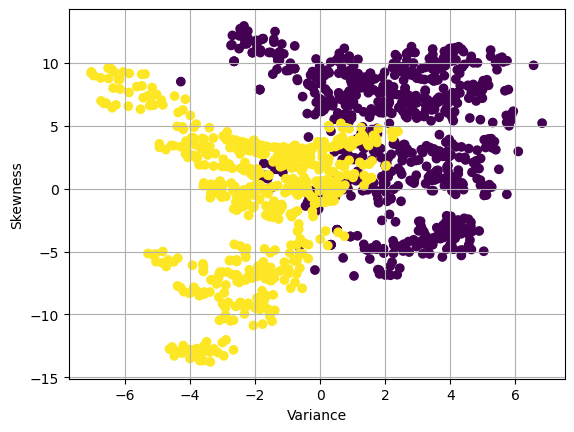

In [16]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.grid()
plt.scatter(df['Variance'], df['Skewness'], c = y);

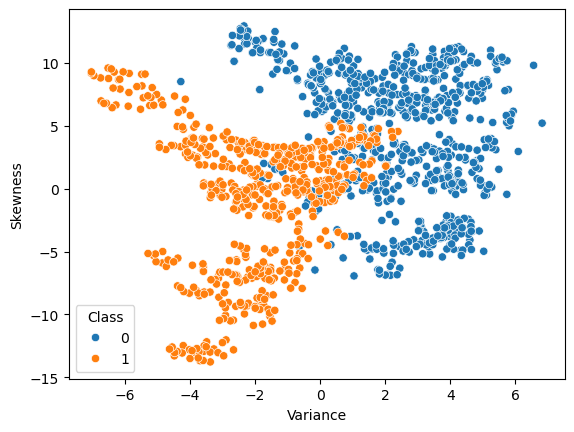

In [19]:
sns.scatterplot(x = df['Variance'], y = df['Skewness'], hue = y);

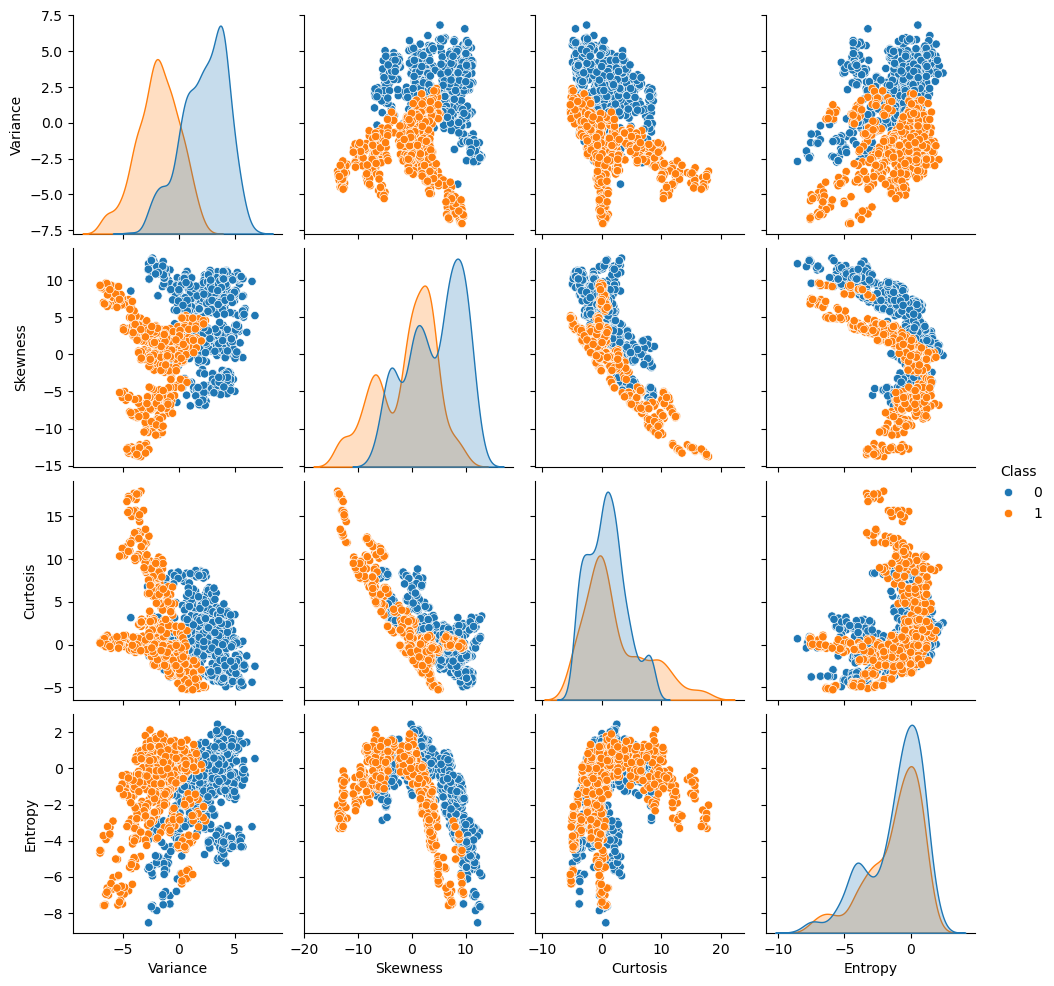

In [28]:
sns.pairplot(df, hue ='Class');

In [23]:
y_val = y.value_counts()
y_val

0    762
1    610
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x1ed7278dad0>,
 [Text(-0.19046171571266454, 1.0833855891822581, '762'),
  Text(0.19046171571266443, -1.0833855891822581, '610')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

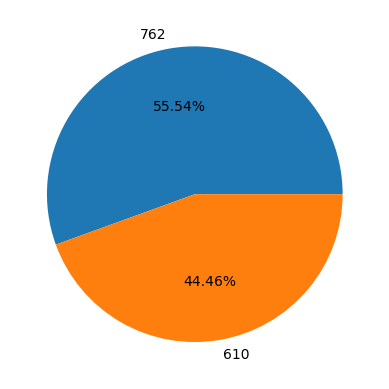

In [27]:
plt.pie(y_val, labels= y_val, autopct='%2.2f%%' )

### Cross-Validation

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

### Build the Model

In [33]:
dt = DecisionTreeClassifier(random_state=0)

dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Performance Evaluation

In [37]:
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [39]:
acc = accuracy_score(y_test, y_pred)
acc

0.9795918367346939

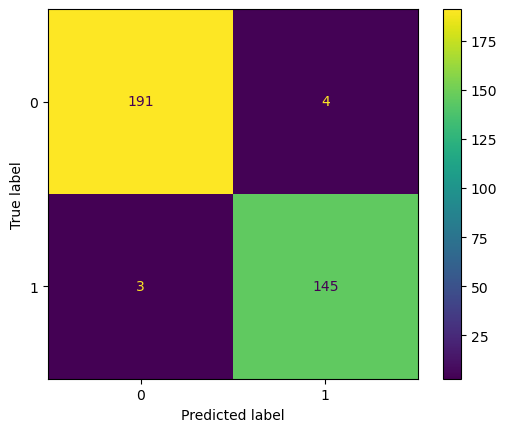

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



### Feature Importances

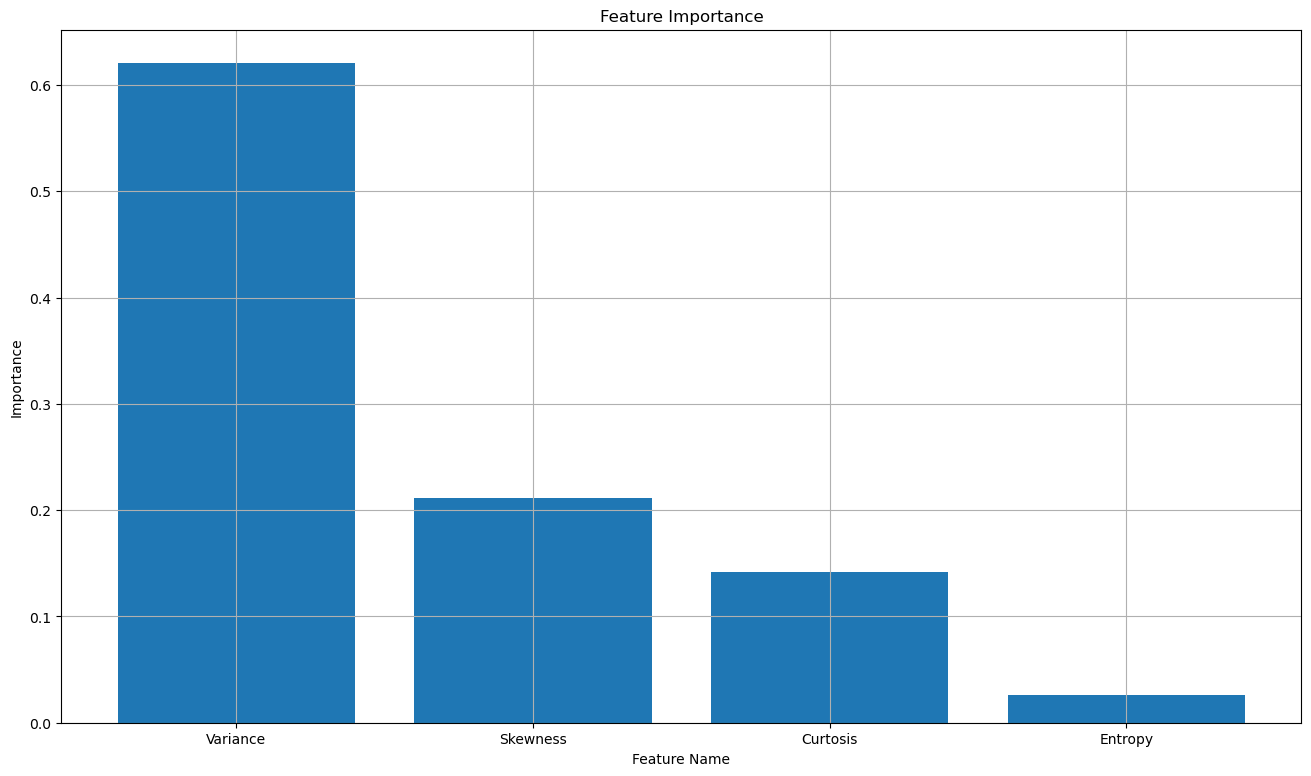

In [43]:
plt.figure(figsize=(16, 9))
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, dt.feature_importances_);

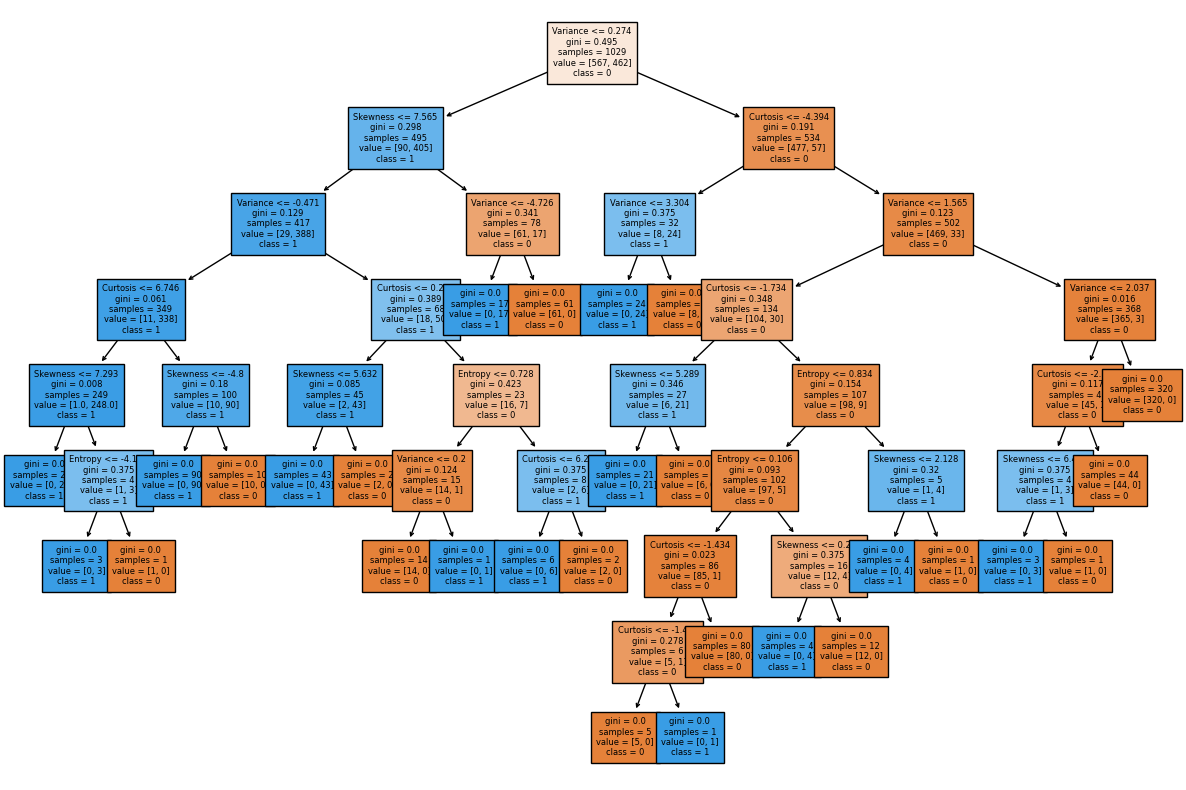

In [46]:
plt.figure(figsize=(15,10))
plot_tree(dt,feature_names=list(x.columns),
               class_names=['0', '1'],
               filled=True,fontsize=6);

In [49]:
new = pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],
                    [3.45660, 9.52280, -4.0112, -3.59440],
                    [4.54590, 8.16740, -2.4586, -1.46210]], columns=x.columns)
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.5549
1,3.45660,9.5228,-4.4112,-3.5944
2,4.54590,8.1674,-2.4586,-1.4621


In [53]:
y_pred1 = dt.predict(new)
y_pred1

array([1, 0, 0], dtype=int64)

### Random Forest

In [56]:
rf = RandomForestClassifier(random_state=0, n_estimators=10)

In [57]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [58]:
y_pred_rf = rf.predict(x_test)

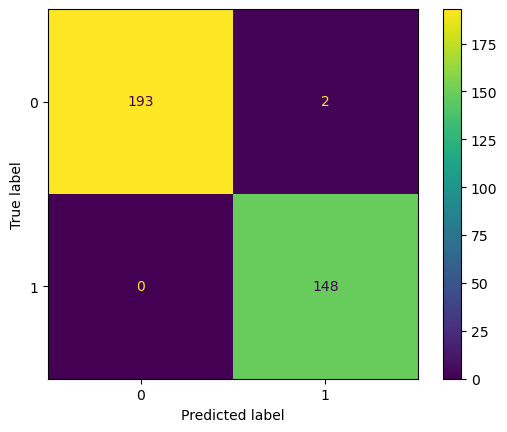

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf);

In [60]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.9941690962099126

In [61]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

